In [1]:
using CLOUD.ConservationLaws
using CLOUD.SpatialDiscretizations
using CLOUD.Solvers
using CLOUD.InitialConditions
using CLOUD.Mesh
using CLOUD.IO
using OrdinaryDiffEq

"Set up paths"
plots_path = "../plots/advection1d_demo/"
results_path = "../results/advection1d_demo/"

"Define the physical problem"
a = 1.0  # advection velocity
A = 1.0  # amplitude
L = 1.0  # domain length
k = 2*π/L  # wave number
T = L/a  # end time

# constant-coefficient linear adection equation with sine wave initial condition
initial_data = InitialDataSine(A,k)
conservation_law = linear_advection_equation(a, λ=1.0)
u_exact = initial_condition(initial_data, conservation_law)

"Set discretization parameters"
M = 10  # number of elements
p = 1  # degree of discretization
N_q = 4  # number of quadrature points

# DGSEM-LGL
elem_type=Line()
approximation_type=DGSEM(p)
quadrature_rule = LGLQuadrature()

"Generate a uniform periodic mesh"
ref_el = reference_element(elem_type, quadrature_rule, N_q)
mesh = uniform_periodic_mesh(ref_el, (0.0,L), M)

┌ Info: Precompiling CLOUD [fb992021-99c7-4c2d-a14b-5e48ac4045b2]
└ @ Base loading.jl:1342


MeshData of dimension 1 with 10 elements

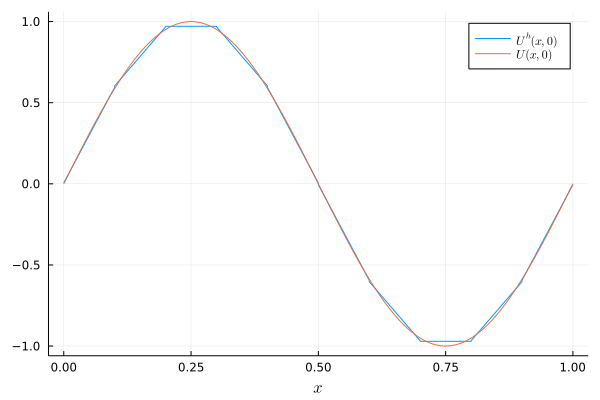

In [5]:
"Construct spatial discretization"
spatial_discretization = SpatialDiscretization(
    mesh,
    ref_el,
    approximation_type)

"Plot the exact solution"
plotter = Plotter(spatial_discretization, plots_path)
visualize(u_exact, plotter, "u_exact.pdf")

ode_problem, R = solver(conservation_law, 
    spatial_discretization,
    initial_data, (0.0, T),
    form=StrongConservationForm());
    
visualize(ode_problem.u0, plotter,
    "initial.pdf", exact_solution=u_exact,
     label="U^h(x,0)", label_exact="U(x,0)")

In [12]:
u = ode_problem.u0
res = element_residual(conservation_law, 
        spatial_discretization, StrongConservationForm(), PhysicalOperatorStorage())
u_facet = apply_to_all_dof(
        fill(spatial_discretization.reference_operators.R,
        spatial_discretization.N_el),u)
res

---------
Element 1:
u: [-9.865181867315369e-17; 0.17279137416650286; 0.4391528906966063; 0.5877852522924731]
u_in: [0.00538831937109456; 0.5944764392066965]
u_out: [-0.005388319371094338; 0.603194923091367]
f: ([-9.865181867315369e-17; 0.17279137416650286; 0.4391528906966063; 0.5877852522924731],)
f_star: [0.005388319371094338; 0.5944764392066965]


LoadError: MethodError: no method matching (::LinearMaps.LinearCombination{Float64, Tuple{LinearMaps.ScaledMap{Float64, Int64, LinearMaps.CompositeMap{Float64, Tuple{LinearMaps.WrappedMap{Float64, Matrix{Float64}}, LinearMaps.UniformScalingMap{Bool}, LinearMaps.WrappedMap{Float64, Matrix{Float64}}, LinearMaps.WrappedMap{Float64, LinearAlgebra.Diagonal{Float64, Vector{Float64}}}}}}, LinearMaps.ScaledMap{Float64, Int64, LinearMaps.CompositeMap{Float64, Tuple{LinearMaps.LinearCombination{Float64, Tuple{LinearMaps.WrappedMap{Float64, Matrix{Float64}}, LinearMaps.ScaledMap{Float64, Int64, LinearMaps.CompositeMap{Float64, Tuple{LinearMaps.WrappedMap{Float64, Matrix{Float64}}, LinearMaps.UniformScalingMap{Bool}, LinearMaps.WrappedMap{Float64, Matrix{Float64}}, LinearMaps.WrappedMap{Float64, LinearAlgebra.Diagonal{Float64, Vector{Float64}}}}}}}}, LinearMaps.WrappedMap{Float64, LinearAlgebra.Diagonal{Float64, Vector{Float64}}}, LinearMaps.WrappedMap{Float64, LinearAlgebra.Transpose{Float64, Matrix{Float64}}}, LinearMaps.WrappedMap{Float64, LinearAlgebra.Diagonal{Float64, Vector{Float64}}}, LinearMaps.WrappedMap{Float64, LinearAlgebra.Diagonal{Float64, Vector{Float64}}}}}}}})()
[0mClosest candidates are:
[0m  (::LinearMaps.LinearMap)([91m::AbstractVector{T} where T[39m) at /Users/tristanmontoya/.julia/packages/LinearMaps/1cWDb/src/LinearMaps.jl:121

In [16]:
sum(spatial_discretization.reference_operators.R*u[:,:,k] for k in 1:3)

2×1 LinearMaps.LinearCombination{Float64} with 3 maps:
  2×1 LinearMaps.CompositeMap{Float64} with 2 maps:
    4×1 LinearMaps.WrappedMap{Float64} of
      4×1 Matrix{Float64}
    2×4 LinearMaps.WrappedMap{Float64} of
      2×4 Matrix{Float64}
  2×1 LinearMaps.CompositeMap{Float64} with 2 maps:
    4×1 LinearMaps.WrappedMap{Float64} of
      4×1 Matrix{Float64}
    2×4 LinearMaps.WrappedMap{Float64} of
      2×4 Matrix{Float64}
  2×1 LinearMaps.CompositeMap{Float64} with 2 maps:
    4×1 LinearMaps.WrappedMap{Float64} of
      4×1 Matrix{Float64}
    2×4 LinearMaps.WrappedMap{Float64} of
      2×4 Matrix{Float64}